In [1]:
import SmartLabApp as sl
import SmartLab
from matplotlib import pyplot as plt
import numpy as np
from tkinter import filedialog

# plt設定
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['xtick.major.width'] = 1.5  # X軸の目盛り線の幅
plt.rcParams['ytick.major.width'] = 1.5  # Y軸の目盛り線の幅
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'

In [2]:
app = sl.App()

In [3]:
app.read_data()

✓ 78-2_1_PEEK_annealed_20251020_2θ_θ.asc: -4.9 ± 1.3 MPa
✓ 78-2_2_PEEK_annealed_20251020_2θ_θ.asc: -5.1 ± 0.9 MPa
✓ 78-2_3_PEEK_annealed_20251020.asc: -2.0 ± 1.4 MPa
✓ 78-2_4_PEEK_annealed_20251020.asc: -3.8 ± 0.6 MPa
✓ 78-3_1_EPPEEK_annealed_202510121_2θ_θ.asc: -5.1 ± 1.5 MPa
✓ 78-3_2_EPPEEK_annealed_202510121_2θ_θ.asc: -9.5 ± 1.6 MPa
✓ 78-3_3_EPPEEK_annealed_20251021.asc: -5.7 ± 1.2 MPa
✓ 78-3_4_EPPEEK_annealed_20251021.asc: -6.6 ± 0.8 MPa
✓ 79-2_1_EPPEEK_none-withrecorder_20251024_2θ_θ.asc: 4.8 ± 5.1 MPa
✓ 79-2_2_EPPEEK_none-withrecorder_20251024_2θ_θ.asc: 7.8 ± 0.9 MPa
✓ 79-2_3_EPPEEK_none-withrecorder_20251024.asc: 2.4 ± 1.3 MPa
✓ 79-2_4_EPPEEK_none-withrecorder_20251024.asc: 4.5 ± 1.5 MPa
✓ 81-1_1_PEEK_none_20251024_2θ_θ.asc: 14.6 ± 1.1 MPa
✓ 81-1_2_PEEK_none_20251024_2θ_θ.asc: 15.6 ± 1.2 MPa
✓ 81-1_3_PEEK_none_20251024.asc: 16.9 ± 1.1 MPa
✓ 81-1_4_PEEK_none_20251024.asc: 15.2 ± 1.2 MPa
✓ 81-2_1_EPPEEK_none-photo_20251104_2θ_θ.asc: 15.1 ± 2.0 MPa
✓ 81-2_2_EPPEEK_none-photo_202511

In [14]:
datas = app.get_datas()
for i, data in enumerate(datas):
    try:
        print(i, data.name)
        print("  ", data.r)
    except Exception as e:
        print("=" * 20)
        print(f"error folder: {data.folder}")
        print('-' * 20)
        print(e)
        print("=" * 20)
        continue

0 74-1_1_PEEK_none_20250827_2θ_θ.asc
   11.67422562719318
1 74-1_2_PEEK_none_20250827_2θ_θ.asc
   14.729409503155482
2 74-1_3_PEEK_none_20250827.asc
   18.131262412603927
3 74-1_4_PEEK_none_20250827.asc
   10.915795013899366
4 74-2_1_EPPEEK_none_20250903_2θ_θ.asc
   7.533912456068212
5 74-2_2_EPPEEK_none_20250903_2θ_θ.asc
   3.511788603457421
6 74-2_3_EPPEEK_none_20250903.asc
   4.432945667970313
7 74-2_4_EPPEEK_none_20250903.asc
   2.934525562402226
8 77-1_1_PEEK_none_20250909_2θ_θ.asc
   18.124538670600675
9 77-1_2_PEEK_none_20250909_2θ_θ.asc
   15.44328031443684
10 77-1_3_PEEK_none_20250909.asc
   13.167516222550734
11 77-1_4_PEEK_none_20250909.asc
   14.716216482015591
12 77-2_1_EPPEEK_none-withrecorder_20251006_2θ_θ.asc
   2.165683269183644
13 77-2_2_EPPEEK_none-withrecorder_20251006_2θ_θ.asc
   7.774973271781624
14 77-2_3_EPPEEK_none-withrecorder_20251006.asc
   -1.8810879934620761
15 77-2_4_EPPEEK_none-withrecorder_20251006.asc
   -4.139559156487161
16 79-1_1_PEEK_none_20250910_

----

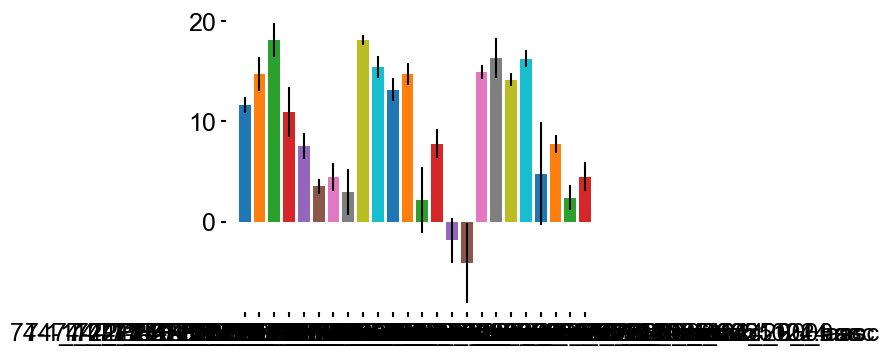

In [16]:
for data in datas:
    name = data.name
    r = data.r
    cir = data.ci_r
    
    plt.bar(name, r, yerr=cir)

13.86267313921299
4.603293072474543
15.36288792240096
0.9800023477540076
15.417021634001719
4.853969233179107


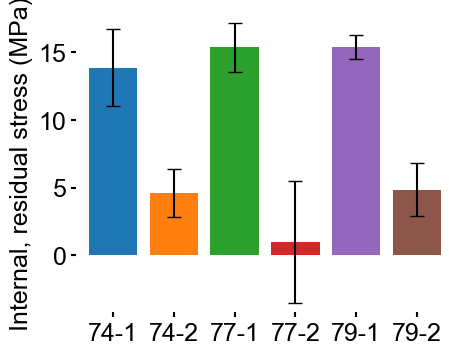

In [19]:
current = []
for i, data in enumerate(datas):
    current.append(data.r)
    if i % 4 == 3:
        r = np.mean(current)
        rc = np.std(current)
        plt.bar(data.name.split('_')[0], r, yerr=rc, capsize=5, label=data.name)
        current = []
        print(r)
# r = np.mean(current)
# rc = np.std(current)
# plt.bar(data.name, r, yerr=rc, capsize=5, label=data.name)
# current = []
plt.ylabel("Internal, residual stress (MPa)")
plt.savefig(filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")]))

In [10]:
15.594444740211943-14.710719789071746

0.8837249511401968

In [ ]:
# 全応力値データ読み込み・並べ替え関数

import os

etc_peek1st = ['スーパーバーン', 'mini', '脱気']
etc_peek2nd = ['anneal']
etc_eppeek1st = []
etc_eppeek2nd = []

def load_and_sort_stress_data(date=False, etc_peek1st=[], etc_peek2nd=[], etc_eppeek1st=[], etc_eppeek2nd=[]):
    """
    全ての応力値データを読み込み、番号順または日付順に並べ替える関数
    
    指定されたディレクトリからSmartLabのデータファイルを読み込み、
    材料の種類と処理条件に基づいて分類し、
    ソート済みの応力データオブジェクトのリストを返します。
    
    Returns:
        tuple: ソート済みのリスト (peek1st, peek2nd, eppeek1st, eppeek2nd)
    """
    dir = 'datas/SmartLab'
    paths = os.listdir(dir)

    # データ分類用の辞書
    categories = {
        'peek1st': [], 'peek2nd': [], 'eppeek1st': [], 'eppeek2nd': [],
        'peek1st_other': [], 'peek2nd_other': [], 'eppeek1st_other': [], 'eppeek2nd_other': []
    }

    # ファイルを分類
    for path in paths:
        data = SmartLab.SmartLab_data(f'{dir}/{path}')
        
        if '_PEEK_none_' in path:
            categories['peek1st'].append(data)
        elif '_PEEK_annealed_' in path:
            categories['peek2nd'].append(data)
        elif '_EPPEEK_none_' in path:
            categories['eppeek1st'].append(data)
        elif '_EPPEEK_annealed_' in path:
            categories['eppeek2nd'].append(data)
        elif '_PEEK_' in path and any(w in path for w in etc_peek1st):
            categories['peek1st_other'].append(data)
        elif '_PEEK_' in path and any(w in path for w in etc_peek2nd):
            categories['peek2nd_other'].append(data)
        elif '_EPPEEK_' in path and any(w in path for w in etc_eppeek1st):
            categories['eppeek1st_other'].append(data)
        elif '_EPPEEK_' in path and any(w in path for w in etc_eppeek2nd):
            categories['eppeek2nd_other'].append(data)
        else:
            print(f"未分類ファイル: {path}")

    # 主要カテゴリに追加分を統合
    for main in ['peek1st', 'peek2nd', 'eppeek1st', 'eppeek2nd']:
        categories[main].extend(categories[f'{main}_other'])

    # プロット設定
    plot_config = [
        ('peek1st', 'gray', 'PEEK-1st'),
        ('peek2nd', 'orange', 'PEEK-2nd'),
        ('eppeek1st', 'blue', 'EPPEEK-1st'),
        ('eppeek2nd', 'green', 'EPPEEK-2nd')
    ]

    plt.figure(figsize=(10, 6))
    
    # データをプロット
    for cat_name, color, _ in plot_config:
        for data in categories[cat_name]:
            try:
                name = int(data.name.split('/')[-1].split('-')[0]) if date else data.name
                plt.errorbar(name, data.r, yerr=data.ci_r, fmt='o', color=color)
            except Exception as e:
                print(f"{'='*20}\nエラーフォルダ: {data.name}\n{'-'*20}\n{e}\n{'='*20}")

    # 平均線をプロット
    plt.axhline(0, color='black', linestyle='-', lw=1)
    for cat_name, color, _ in plot_config:
        if categories[cat_name]:
            plt.axhline(np.mean([d.r for d in categories[cat_name]]), color=color, linestyle='-.')

    # ラベル
    plt.xlabel('日付' if date else 'サンプル番号')
    plt.ylabel('内部残留応力 (MPa)')

    # 統計情報のテキスト作成
    stats_count = '\n'.join([f"{label}: {len(categories[cat])}個" 
                             for cat, _, label in plot_config])
    stats_avg = '\n'.join([f"{label}: {np.mean([d.r for d in categories[cat]]):.2f} ± {np.std([d.r for d in categories[cat]]):.2f} MPa" 
                           for cat, _, label in plot_config if categories[cat]])
    
    no_init = min([int(path.split('-')[0]) for path in paths])
    no_fin = max([int(path.split('-')[0]) for path in paths])
    
    plt.text(0.05, 0.95, f"サンプル数:\n{stats_count}", 
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)
    plt.text(0.35, 0.95, f"平均内部応力:\n{stats_avg}", 
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)
    plt.text(0.05, 0.05, f"サンプル No.{no_init} - No.{no_fin}", 
             transform=plt.gca().transAxes, verticalalignment='bottom', fontsize=12)

    plt.savefig(filedialog.asksaveasfilename(defaultextension='.svg'))
    
    return categories['peek1st'], categories['peek2nd'], categories['eppeek1st'], categories['eppeek2nd']


Uncategorized file: 1-1_1_Al_none_20240718_2θ_θ.TXT
Uncategorized file: 1-1_1_PolyimidePEEK_お試し_20250107_2θ_θ.TXT
Uncategorized file: 1-2_1_Al_none_20240718_2θ_ω.TXT
Uncategorized file: 24-3_1_PEEK_CutByDiamondcutter-2_20241001_2θ_θ.TXT
Uncategorized file: 24-3_1_PEEK_CutByDiamondcutter_20241001_2θ_θ.TXT
Uncategorized file: 27-3_1_EPPEEK_HeatNonPre_20240202_2θ_θ.TXT
Uncategorized file: 27-3_2_EPPEEK_HeatNonPre_20240202_2θ_θ.TXT
Uncategorized file: 27-3_3_EPPEEK_HeatNonPre_20240202_2θ_θ.TXT
Uncategorized file: 27-3_4_EPPEEK_HeatNonPre_20240202_2θ_θ.TXT
Uncategorized file: 3-2_1_EPnylon_HN2200_20241030_2θ_θ.TXT
Uncategorized file: 3-2_2_EPnylon_HN2200_20241030_2θ_θ.TXT
Uncategorized file: 3-2_3_EPnylon_HN2200_20241030_2θ_θ.TXT
Uncategorized file: 3-2_4_EPnylon_HN2200_20241030_2θ_θ.TXT
Uncategorized file: 31-2_1_EPPEEK_NoPre_20240202_2θ_θ.TXT
Uncategorized file: 31-2_2_EPPEEK_NoPre_20240202_2θ_θ.TXT
Uncategorized file: 31-2_3_EPPEEK_NoPre_20240202_2θ_θ.TXT
Uncategorized file: 31-2_4_EPPEE

In [2]:
import os


dir = 'datas/SmartLab'
paths = os.listdir(dir)
use_number = [71, 72, 78, 74]
use_paths = [path for path in paths if any(f'{str(num)}-' in path for num in use_number)]
p1 = []
p2 = []
d1 = []
d2 = []
h1 = []
h2 = []
for path in use_paths:
    if '_PEEK_none_' in path:
        p1.append(SmartLab.SmartLab_data(f'{dir}/{path}'))
    elif '_PEEK_annealed_' in path:
        p2.append(SmartLab.SmartLab_data(f'{dir}/{path}'))
    elif '_EPPEEK_none_' in path:
        d1.append(SmartLab.SmartLab_data(f'{dir}/{path}'))
    elif '_EPPEEK_annealed_' in path:
        d2.append(SmartLab.SmartLab_data(f'{dir}/{path}'))
    elif 'annealed' in path:
        h2.append(SmartLab.SmartLab_data(f'{dir}/{path}'))
    else:
        h1.append(SmartLab.SmartLab_data(f'{dir}/{path}'))

In [3]:
len(p1), len(p2), len(d1), len(d2), len(h1), len(h2)

(16, 8, 4, 4, 4, 4)

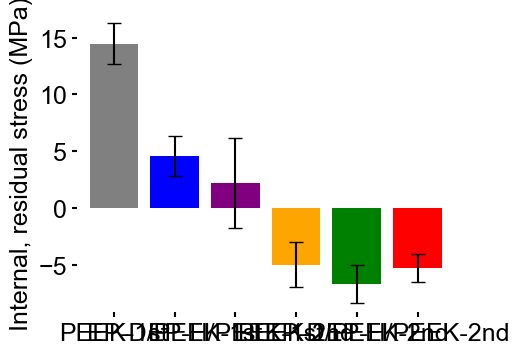

In [32]:
plt.bar('PEEK-1st', np.mean([d.r for d in p1]), yerr=np.std([d.r for d in p1]), capsize=5, color='gray')
plt.bar('EP-D/PEEK-1st', np.mean([d.r for d in d1]), yerr=np.std([d.r for d in d1]), capsize=5, color='blue')
plt.bar('EP-H/PEEK-1st', np.mean([d.r for d in h1]), yerr=np.std([d.r for d in h1]), capsize=5, color='purple')
plt.bar('PEEK-2nd', np.mean([d.r for d in p2]), yerr=np.std([d.r for d in p2]), capsize=5, color='orange')
plt.bar('EP-D/PEEK-2nd', np.mean([d.r for d in d2]), yerr=np.std([d.r for d in d2]), capsize=5, color='green')
plt.bar('EP-H/PEEK-2nd', np.mean([d.r for d in h2]), yerr=np.std([d.r for d in h2]), capsize=5, color='red')

plt.ylabel("Internal, residual stress (MPa)")
plt.savefig(filedialog.asksaveasfilename(defaultextension=".svg", filetypes=[("SVG files", "*.svg")]))

In [7]:
print(np.mean([d.r for d in p1]))
print(np.mean([d.r for d in p2]))
print(np.mean([d.r for d in d1]))
print(np.mean([d.r for d in d2]))
print(np.mean([d.r for d in h1]))
print(np.mean([d.r for d in h2]))
print(np.mean([d.r for d in p2])-np.mean([d.r for d in h2]))

14.471082955682988
-4.9878959552271604
4.603293072474543
-6.709228667927686
2.2198870224075247
-5.311007164020534
0.3231112087933736


In [8]:
np.mean([d.r for d in p1])

14.471082955682988